<a href="https://colab.research.google.com/github/nyksrox/NIKHILR/blob/master/Timeseries%20Using%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [ ]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: ignored

In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Train_ts_Data.csv']),usecols=[1])


In [ ]:
print(df2.shape)

(2010, 1)


In [ ]:
scaler= MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(df2)

In [ ]:
# Converting numpy array into pandas dataframe
data1 = pd.DataFrame(data)
print(data1.head())

          0
0  0.213979
1  0.201376
2  0.229833
3  0.262370
4  0.252291


In [ ]:
train_size = int(len(data) * 0.85)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print(len(train), len(test))

1708 302


In [ ]:
def create_data(data, look_back=1):
	dataX, dataY = [], []
	for i in range(len(data)-look_back-1):
		a = data[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(data[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
print("done")

done


In [ ]:
print(data.shape)

(2010, 1)


In [ ]:
look_back = 1
trainX, trainY = create_data(train, look_back)
testX, testY = create_data(test, look_back)

In [ ]:
print(len(trainX))
print(trainX.shape[0])

1706
1706


In [ ]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=50, verbose=2)





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





 - 1s - loss: 0.1659
Epoch 2/50
 - 0s - loss: 0.1128
Epoch 3/50
 - 0s - loss: 0.0752
Epoch 4/50
 - 0s - loss: 0.0505
Epoch 5/50
 - 0s - loss: 0.0360
Epoch 6/50
 - 0s - loss: 0.0284
Epoch 7/50
 - 0s - loss: 0.0250
Epoch 8/50
 - 0s - loss: 0.0236
Epoch 9/50
 - 0s - loss: 0.0229
Epoch 10/50
 - 0s - loss: 0.0225
Epoch 11/50
 - 0s - loss: 0.0220
Epoch 12/50
 - 0s - loss: 0.0216
Epoch 13/50
 - 0s - loss: 0.0212
Epoch 14/50
 - 0s - loss: 0.0208
Epoch 15/50
 - 0s - loss: 0.0204
Epoch 16/50
 - 0s - loss: 0.0200
Epoch 17/50
 - 0s - loss: 0.0196
Epoch 18/50
 - 0s - loss: 0.0192
Epoch 19/50
 - 0s - loss: 0.0188
Epoch 20/50
 - 0s - loss: 0.0184
Epoch 21/50
 - 0s - loss: 0.0180
Epoch 22/50
 - 0s - loss: 0.0177
Epoch 23/50
 - 0s - loss: 0.0174
Epoch 24/50
 - 0s - loss: 0.0171
Epoch 25/50
 - 0s - loss: 0.0168
Epoch 26/50
 - 0s - loss: 0.0165
Epoch 27/50
 - 0s - loss: 0.0163
Epoch 28/50


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 6570.41 RMSE
Test Score: 9759.24 RMSE


In [ ]:
d1 = pd.DataFrame(testY)
d2 = pd.DataFrame(testPredict)

In [ ]:
print(testY)
#print(testPredict)

[[31755. 48840. 43443. 20994. 22357. 29046. 26196. 19142. 50154. 49395.
  40225. 42415. 45667. 42985. 25910. 45117. 39565. 37877. 41495. 35848.
  30206. 21812. 47202. 44497. 43397. 37488. 34558. 35816. 26408. 46371.
  43588. 40130. 33175. 40610. 41515. 29567. 56980. 52419. 51411. 46542.
  44291. 42778. 26334. 46169. 46752. 44236. 42742. 39849. 30700. 21980.
  43493. 29043. 35859. 49716. 52179. 46847. 29273. 53785. 49606. 54160.
  50855. 46790. 45379. 32730. 51783. 44547. 50039. 47455. 51578. 36136.
  24534. 42854. 38073. 42858. 42345. 42161. 35649. 19826. 42811. 50955.
  42570. 43085. 38691. 24790. 21887. 45669. 44900. 49682. 50707. 49608.
  51060. 31190. 60419. 45981. 57034. 45800. 44638. 48289. 32794. 47147.
  45981. 46114. 44312. 42227. 41247. 28035. 44395. 39659. 43522. 41444.
  40658. 30347. 24465. 45963. 44255. 43669. 45939. 44988. 38224. 26845.
  32291. 43372. 45379. 45544. 42206. 33313. 27642. 53336. 54792. 50869.
  53396. 49899. 44411. 28539. 47054. 46731. 36951. 17564. 41202.

In [ ]:
de1 = pd.DataFrame(testY)
#print(type(de1)
print(de1)

       0        1        2        3    ...      296      297      298      299
0  31755.0  48840.0  43443.0  20994.0  ...  46400.0  47914.0  43522.0  42933.0

[1 rows x 300 columns]


In [ ]:
def divide_chunks(l, n): 
      
    # looping till length l 
    for i in range(0, len(l), n):  
        yield l[i:i + n]

In [ ]:
n = 1
  
x = list(divide_chunks(testY, n)) 
print (x) 

[array([[31755., 48840., 43443., 20994., 22357., 29046., 26196., 19142.,
        50154., 49395., 40225., 42415., 45667., 42985., 25910., 45117.,
        39565., 37877., 41495., 35848., 30206., 21812., 47202., 44497.,
        43397., 37488., 34558., 35816., 26408., 46371., 43588., 40130.,
        33175., 40610., 41515., 29567., 56980., 52419., 51411., 46542.,
        44291., 42778., 26334., 46169., 46752., 44236., 42742., 39849.,
        30700., 21980., 43493., 29043., 35859., 49716., 52179., 46847.,
        29273., 53785., 49606., 54160., 50855., 46790., 45379., 32730.,
        51783., 44547., 50039., 47455., 51578., 36136., 24534., 42854.,
        38073., 42858., 42345., 42161., 35649., 19826., 42811., 50955.,
        42570., 43085., 38691., 24790., 21887., 45669., 44900., 49682.,
        50707., 49608., 51060., 31190., 60419., 45981., 57034., 45800.,
        44638., 48289., 32794., 47147., 45981., 46114., 44312., 42227.,
        41247., 28035., 44395., 39659., 43522., 41444., 40658.,

In [ ]:
import sklearn

In [ ]:
from sklearn import metrics

In [ ]:
Accuracy = metrics.accuracy_score(testY,testPredict)
acc = Accuracy*100
print("Accuracy:",acc,"%")

ValueError: ignored

In [ ]:
t1 = pd.DataFrame(testY)
print(len(t1))
tPredict = pd.DataFrame(testPredict)
#print(len(tPredict))

t1.to_csv('testY.csv')
tPredict.to_csv('tPredict.csv')

files.download('testY.csv')
files.download('tPredict.csv')

1


In [ ]:
import numpy as np
t2 = np.reshape(testY,(300,1))
print(testPredict)


[[44407.97 ]
 [30951.592]
 [44713.58 ]
 [40265.92 ]
 [23108.4  ]
 [24048.51 ]
 [28894.07 ]
 [26785.361]
 [21859.623]
 [45803.03 ]
 [45173.52 ]
 [37646.684]
 [39425.883]
 [42092.11 ]
 [39891.305]
 [26577.2  ]
 [41639.484]
 [37113.61 ]
 [35757.727]
 [38676.62 ]
 [34143.87 ]
 [29769.154]
 [23670.516]
 [43358.35 ]
 [41130.004]
 [40228.273]
 [35446.906]
 [33127.98 ]
 [34118.57 ]
 [26940.084]
 [42672.336]
 [40384.633]
 [37569.855]
 [32048.557]
 [37958.344]
 [38692.883]
 [29285.959]
 [51475.387]
 [47684.16 ]
 [46846.617]
 [42813.41 ]
 [40960.914]
 [39722.184]
 [26886.035]
 [42505.758]
 [42986.723]
 [40915.785]
 [39692.777]
 [37342.8  ]
 [30144.574]
 [23786.742]
 [40306.85 ]
 [28891.814]
 [34152.57 ]
 [45439.69 ]
 [47484.69 ]
 [43065.14 ]
 [29064.582]
 [48819.69 ]
 [45348.47 ]
 [49131.465]
 [46384.883]
 [43018.086]
 [41855.023]
 [31703.512]
 [47155.66 ]
 [41171.06 ]
 [45707.62 ]
 [43567.434]
 [46985.336]
 [34371.793]
 [25585.045]
 [39784.27 ]
 [35914.582]
 [39787.527]
 [39368.78 ]
 [39218.77 ]

In [ ]:
print(len(testPredict))

300


In [ ]:
#Accuracy = metrics.accuracy_score(t2,testPredict)
#acc = Accuracy*100

import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
print(mean_absolute_percentage_error(t2,testPredict))

18.97346313750313


In [ ]:
from google.colab import files
t1.to_csv('testData.csv') 
files.download('testData.csv')
testPredict.TO_CSV('Predictions.csv')
files.download('Predictions.csv')

MessageError: ignored

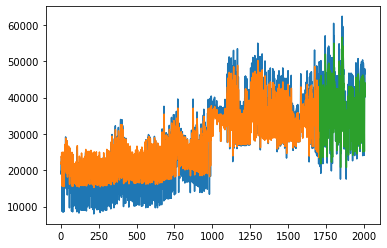

numpy.ndarray

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(data)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(data)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
type(testPredictPlot)

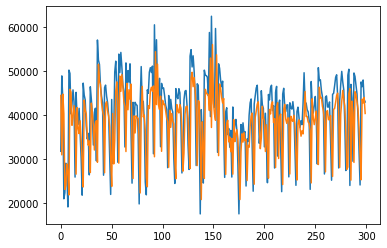

In [ ]:
plt.plot(t2)
plt.plot(testPredict)
plt.show()